# NMDA homework 2, question 3
picture compression with my_PCA

王敏行 ID:2018012386 wangmx18@mails.tsinghua.edu.cn

Nov 21, 2021

Following codes are generated by myself, with the help of official documents and books. Codes in the last part refers to the demo from TA.

In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [44]:
##从question1中拿my_PCA3过来
def my_PCA3(data, num):
    """
    参数：
    data:输入数据
    num:希望降到的维度
    返回：
    new_data:compressed img
    eig_values:特征值
    """
    num_samples,num_features=data.shape                 #输入数据形状
    #mean = np.mean(data,axis=0)                     
    #data = data-mean[np.newaxis,:] 
    U, Sigma, VT = np.linalg.svd(data)
    vec1 = U[:,:num]
    eigV = Sigma[:num]
    vec2 = VT[:num,:]
    new_img = vec1.dot(np.diag(eigV)).dot(vec2).astype(np.uint8)
    return new_img,Sigma

def img_score(data1, data2):
    s = np.sum(np.square(data1-data2))/np.sum(data1)
    return s


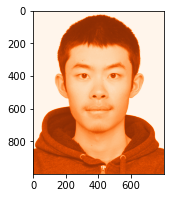

In [45]:
img=cv2.imread('Max_201901_5-4.JPG')
# i=cv2.imread('Max_201901_5-4.png')
img = img[:1000,:800,:]
img =255-np.mean(img,2)
h,w =img.shape
plt.imshow(img, cmap=plt.cm.Oranges)
plt.show()

## first try: decomposition w/o slicing

Text(0.5, 1.0, 'div = 800')

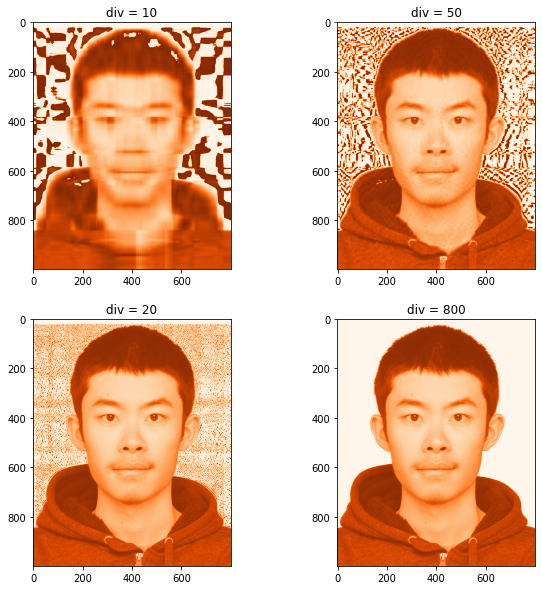

In [46]:
new_img1,eigV = my_PCA3(img,10)
new_img2,eigV = my_PCA3(img,50)
new_img3,eigV = my_PCA3(img,200)
new_img4,eigV = my_PCA3(img,800)
plt.rcParams['figure.figsize'] = (10,10) 
plt.subplot(2,2,1)
plt.imshow(new_img1,cmap=plt.cm.Oranges)
plt.title('div = 10')
plt.subplot(2,2,2)
plt.imshow(new_img2,cmap=plt.cm.Oranges)
plt.title('div = 50')
plt.subplot(2,2,3)
plt.imshow(new_img3,cmap=plt.cm.Oranges)
plt.title('div = 20')
plt.subplot(2,2,4)
plt.imshow(new_img4,cmap=plt.cm.Oranges)
plt.title('div = 800')

77.93289755053095
76.12297592984179
59.57676946889621
46.36593446619632
0.002494587647244221


Text(0.5, 1.0, 'div = 800')

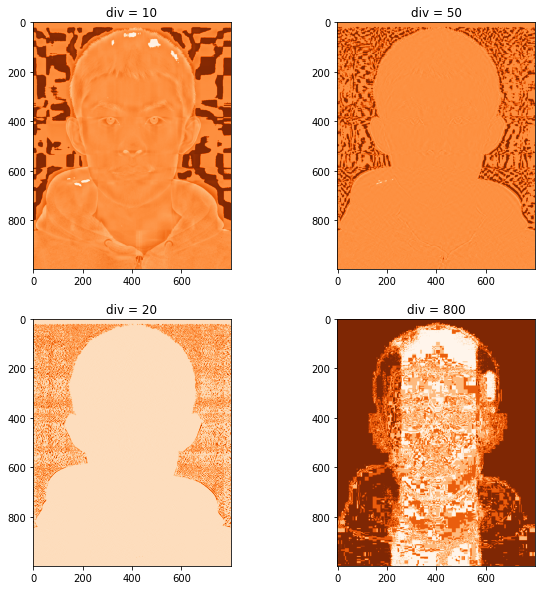

In [47]:
print(img_score(img, np.ones(np.shape(img))*np.mean(np.mean(img,1),0)))
print(img_score(img, new_img1))
print(img_score(img, new_img2))
print(img_score(img, new_img3))
print(img_score(img, new_img4))
plt.rcParams['figure.figsize'] = (10,10) 
plt.subplot(2,2,1)
plt.imshow(new_img1-img,cmap=plt.cm.Oranges)
plt.title('div = 10')
plt.subplot(2,2,2)
plt.imshow(new_img2-img,cmap=plt.cm.Oranges)
plt.title('div = 50')
plt.subplot(2,2,3)
plt.imshow(new_img3-img,cmap=plt.cm.Oranges)
plt.title('div = 20')
plt.subplot(2,2,4)
plt.imshow(new_img4-img,cmap=plt.cm.Oranges)
plt.title('div = 800')


感觉黑白照片直接用PCA降维效果还可以，存在一定的低频干扰条纹。
## second try: w/ slicing

In [48]:
def slice_PCA(img,part_num,div):
    w1 = int(1000 / part_num)
    h1 = int(800 / part_num)
    new_slice = np.zeros((1000,800))
    for i in range(part_num):
        for j in range(part_num):
            part = img[i*w1:(i+1)*w1,j*h1:(j+1)*h1]
            new_part,eigV = my_PCA3(part,div)
            new_slice[i*w1:(i+1)*w1,j*h1:(j+1)*h1] = new_part
            new_slice = new_slice.astype(np.uint8)
    return new_slice

Text(0.5, 1.0, '20*20 sliced, div = 40 for each')

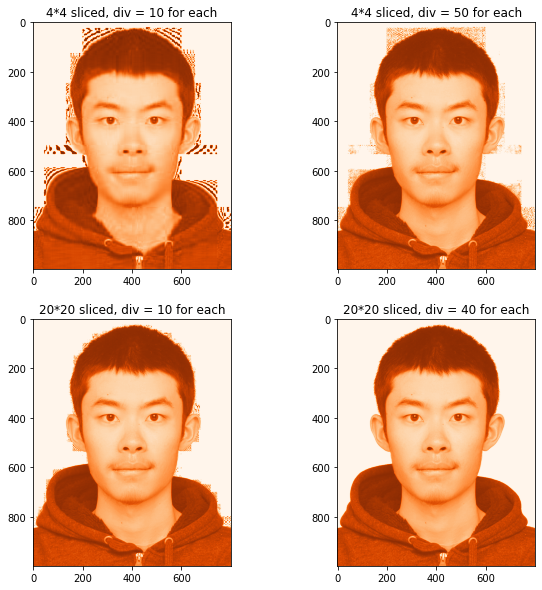

In [49]:
new_slice1 = slice_PCA(img,4,10)
new_slice2 = slice_PCA(img,4,50)
new_slice3 = slice_PCA(img,20,10)
new_slice4 = slice_PCA(img,20,40)
plt.rcParams['figure.figsize'] = (10,10) 
plt.subplot(2,2,1)
plt.imshow(new_slice1,cmap=plt.cm.Oranges)
plt.title('4*4 sliced, div = 10 for each')
plt.subplot(2,2,2)
plt.imshow(new_slice2,cmap=plt.cm.Oranges)
plt.title('4*4 sliced, div = 50 for each')
plt.subplot(2,2,3)
plt.imshow(new_slice3,cmap=plt.cm.Oranges)
plt.title('20*20 sliced, div = 10 for each')
plt.subplot(2,2,4)
plt.imshow(new_slice4,cmap=plt.cm.Oranges)
plt.title('20*20 sliced, div = 40 for each')

Text(0.5, 1.0, '0.0025171926861201153')

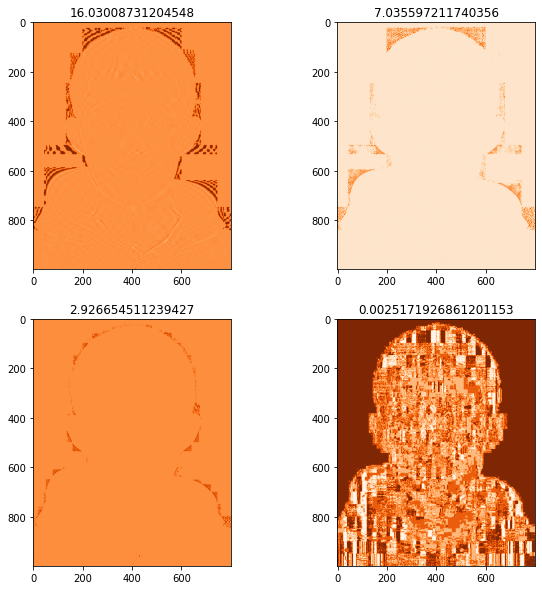

In [50]:
plt.figure()
plt.rcParams['figure.figsize'] = (10,10) 
plt.subplot(2,2,1)
plt.imshow(new_slice1-img,cmap=plt.cm.Oranges)
plt.title(img_score(img, new_slice1))
plt.subplot(2,2,2)
plt.imshow(new_slice2-img,cmap=plt.cm.Oranges)
plt.title(img_score(img, new_slice2))
plt.subplot(2,2,3)
plt.imshow(new_slice3-img,cmap=plt.cm.Oranges)
plt.title(img_score(img, new_slice3))
plt.subplot(2,2,4)
plt.imshow(new_slice4-img,cmap=plt.cm.Oranges)
plt.title(img_score(img, new_slice4))

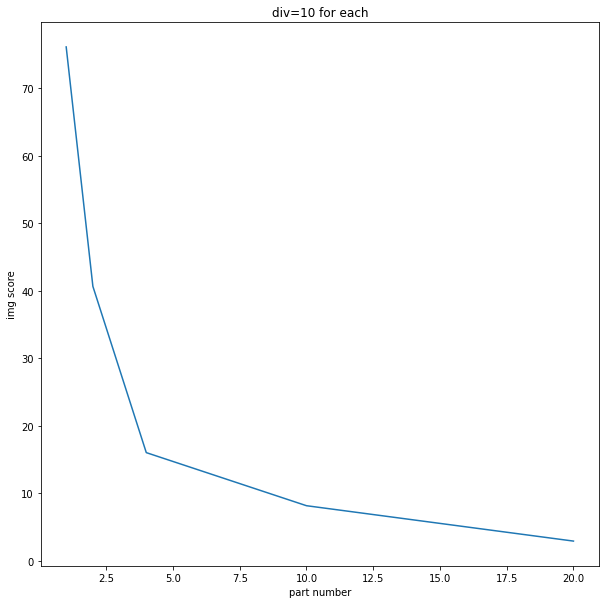

In [51]:
slices = np.array([1,2,4,10,20])
scores = np.zeros(5)
n = 0
for i in slices:
    slc = slice_PCA(img,i,10)
    scores[n] = img_score(img,slc)
    n += 1

plt.figure()
plt.rcParams['figure.figsize'] = (3,3) 
plt.plot(slices,scores)
plt.ylabel('img score')
plt.xlabel('part number')
plt.title('div=10 for each')
plt.show()

维度越大，对于信息的保留月完整。若采用的维度较小，则会出现被压缩的图片在图像边缘处出现条纹。分块数目越大，对于信息的保留也会越好。
保留信息和压缩比是一组需要平衡的代价。

可见，对于一张800\*1000的灰度照片，在每一个小块取前10维的SVD-PCA降维的情况下，比较有效率的分块方法是分成3\*3的小块。

采用`img_score()`进行定量分析，得分越大说明偏差越大。定量的评估验证了上面所说的分块数目、主成分数目对于信息保存的关系。